* H&M US homepage to crawl: http://www.hm.com/us/

# Steps to do
1. Extract the image of an item page
 * Example: http://www.hm.com/us/product/72163?article=72163-A
2. Extract all the item links
 * Items to extract: women, men, kids, and their sale items.
 * All women's items: http://www.hm.com/us/products/ladies
 * All women's sale items: http://www.hm.com/us/products/sale/ladies
 * All men's items: http://www.hm.com/us/products/men
 * All men's sale items: http://www.hm.com/us/products/sale/men
 * All kids' items: http://www.hm.com/us/products/kids
 * All kids' sale items: http://www.hm.com/us/products/sale/kids

Each item page the second image is the full image without person. (not proved)
The second image is to extract in each item page.

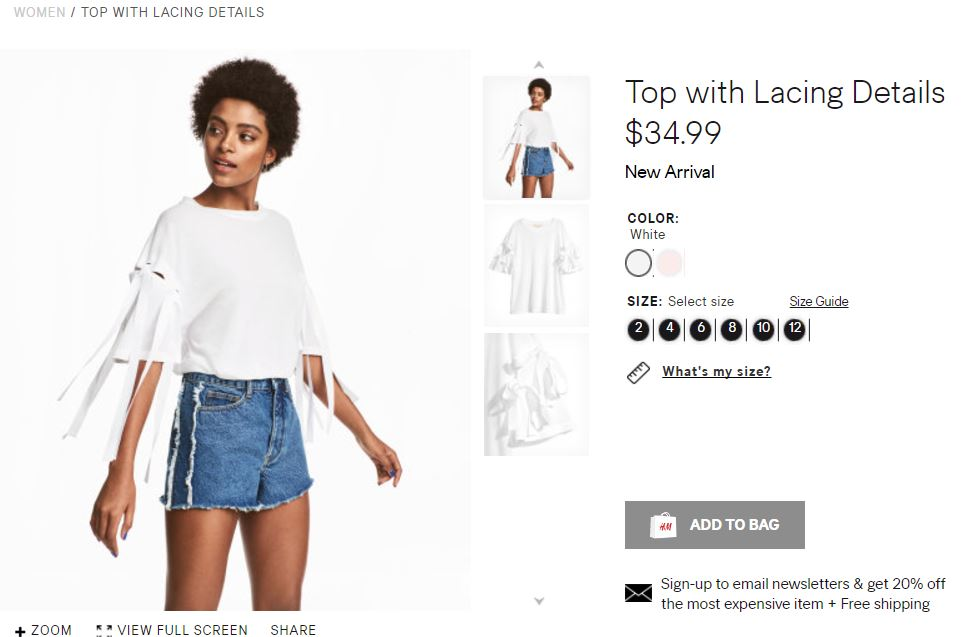

In [1]:
from IPython.display import Image
Image("item_page_capture.jpg")

In each item page, there are 3 item images: FASHION_FRONT, STILL_LIFE_FRONT, and DETAIL in the top-down order.

In [2]:
import urllib

In [3]:
item_url = "http://www.hm.com/us/product/72163?article=72163-A"

In [4]:
handle = urllib.urlopen(item_url)

In [5]:
html_gunk =  handle.read()

In [ ]:
from HTMLParser import HTMLParser

In [7]:
class HnM_ItemPage_Parser(HTMLParser):
    in_head_tag = False
    in_title_tag = False
    image_found = False
    image_url = ""
    name = ""
    color = ""
    who = ""
    
    def handle_starttag(self, tag, attrs):
        if tag == "head":
            self.in_head_tag = True
        if tag == "title":
            self.in_title_tag = True
        if tag == "a":
            for attr in attrs:
                if attr[0] == "class" and attr[1] == "STILL_LIFE_FRONT":
                    self.image_found = True
            if self.image_found == True:
                for attr in attrs:
                    if attr[0] == "href":
                        self.image_url = attr[1]
                        self.image_found = False
        
    def handle_endtag(self, tag):
        if tag == "head" and self.in_head_tag:
            self.in_head_tag = False
        if tag == "title" and self.in_head_tag:
            self.in_title_tag = False
            
    def handle_data(self, data):
        if self.in_head_tag and self.in_title_tag:
            if data[-1] == 'H':
                data_list = data.split(' | ')
                self.name =  data_list[0]
                self.color = data_list[1]
                self.who = data_list[2]
        
    def get_image_url(self):
        return "http:" + self.image_url
    
    def get_name(self):
        return self.name
    
    def get_color(self):
        return self.color
    
    def get_who(self):
        return self.who

In [8]:
parser = HnM_ItemPage_Parser()

In [9]:
parser.feed(str(html_gunk))

In [10]:
item_serial = item_url[item_url.find("article=")+len("article="):]

In [11]:
print "Image URL: " + parser.get_image_url()
print "Name: " + parser.get_name()
print "Color: " + parser.get_color()
print "Who: " + parser.get_who()
print "Serial: " + item_serial

Image URL: http://lp.hm.com/hmprod?set=key[source],value[/model/2017/E00 0533002 001 69 4057.jpg]&set=key[rotate],value[]&set=key[width],value[]&set=key[height],value[]&set=key[x],value[]&set=key[y],value[]&set=key[type],value[STILL_LIFE_FRONT]&set=key[hmver],value[1]&call=url[file:/product/large]
Name: Top with Lacing Details
Color: White
Who: Women
Serial: 72163-A


In [12]:
image_contents = urllib.urlopen(parser.get_image_url())

In [13]:
f = open(item_serial + ".jpg", "wb")
f.write(image_contents.read())
f.close()

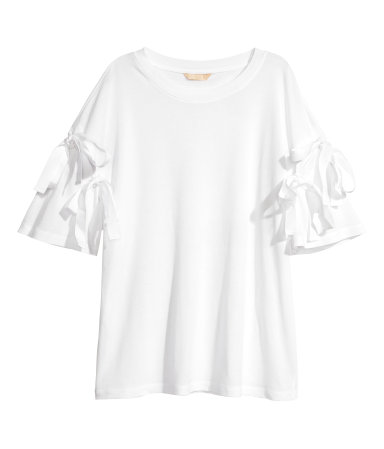

In [14]:
Image(item_serial + ".jpg")